# Imports

First things first, the necessary libraries must be imported. numpy and pandas for data processing and matplotlib, wordcloud, seaborn and folium for data visualization.

In [480]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # For waffle Charts
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import folium
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.palettes import brewer
import math

# Data Processing

Before we start plotting some graphs, we need to load the dataset and do some transformations to make the data visualization process easier.

Let's start by loading the dataset, which is stored in a single sheet of an Excel file.

In [481]:
def load_sheet(path:str, sheet_name: str):
    return pd.read_excel(path, sheet_name=sheet_name, skiprows=range(20), skipfooter=2)

df_canada = load_sheet('../data/raw/Canada.xlsx', 'Canada by Citizenship')

Having successfully loaded the dataset, we can take a look at the first few lines.

In [482]:
df_canada.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


Some unnecessary columns are going to be removed and others renamed to more meaningful names. Furthermore, a 'Total' column is going to be created, which sums up the total immigrants by country from 1980 to 2013.

In [483]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)

/var/folders/xt/8sxc97b127n0yx4s5xdv5wch0000gn/T/ipykernel_53524/4155380707.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



The default index of the dataset is a numeric range from 0 to 194, which makes it difficult to look for a specific country. So we are setting the 'Country' column as the index, which allows to search for a country by its name. Plus, column names that are integers will be converted to strings because having years as columns might easily be confused by positional indices. 

In [484]:
df_canada.set_index('Country', inplace=True)
df_canada.columns = list(map(str, df_canada.columns))

Having a variable with the full range of years in the string format will come in handy for plotting, so we are creating one.

In [485]:
years = list(map(str, range(1980, 2014)))

And that's it, the processing steps above are enough to start plotting some beauties!

# Data Visualization

We finally get to the fun part. However, we still need to make matplotlib and bokeh work seamlessly inside the notebook.

To make the graphs appear and be stored within the notebook, we need to use the matplotlib [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions). Such function receives a parameter which is the [matplotlib backend](https://matplotlib.org/stable/tutorials/introductory/usage.html#what-is-a-backend) that we want to enable. By enabling the inline backend, we will only draw static images in the notebook.

In [486]:
%matplotlib inline 

We are using the ggplot stylesheet, which is just one of the [many available](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). This style will also be used for seaborn plots.

In [487]:
mpl.style.use(['ggplot'])

Also, since we want to display bokeh plots in the notebook, we need to call the output_notebook() function.

In [488]:
output_notebook()

Loading BokehJS ...

Let's start with one of the simplest types of plots, line plots!

## Line Plots

Line plots consist of points connected by straight line segments. These are most commonly used with continuous datasets and when we need to visualize the data over a period of time.

The line plot below shows the immigration from Haiti to Canada, and how the [2010 earthquake](https://en.wikipedia.org/wiki/2010_Haiti_earthquake) influenced this value.  

In [489]:
# Change the index values of Haiti to type integer for plotting
haiti = df_canada.loc['Haiti', years]
haiti.index = haiti.index.map(int) 

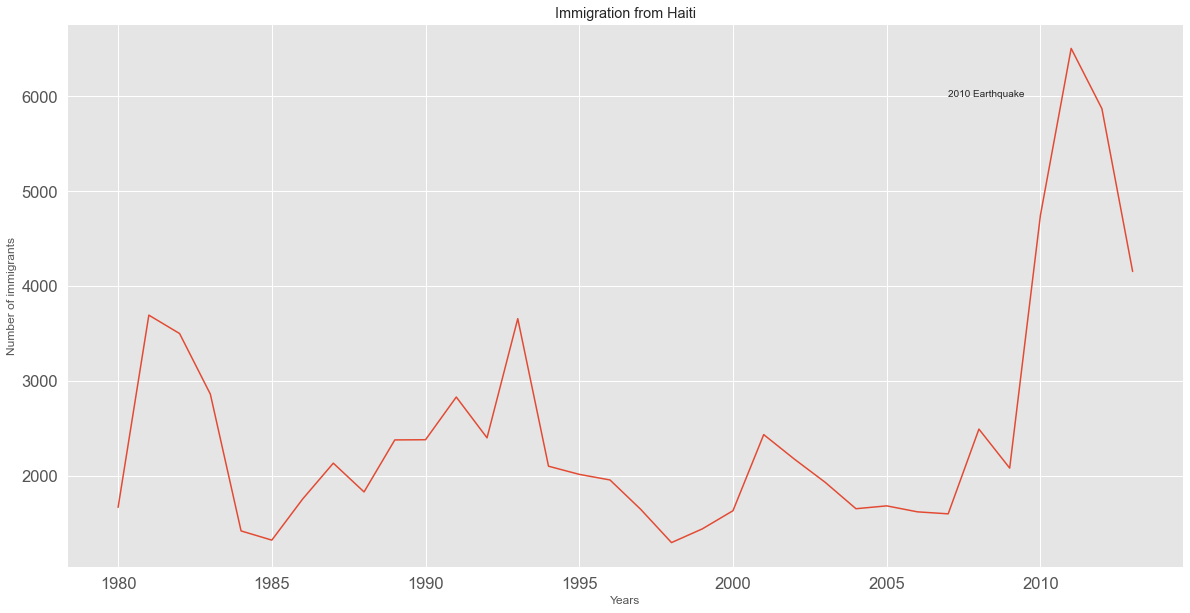

In [490]:
ax = haiti.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')

# Annotate plot with the 2010 Earthquake 
plt.text(2007, 6000, '2010 Earthquake');

To note that when adding the 2010 earthquake annotation to the plot, since both axis are of type integer, there is only the need to specify the value. If an axis has a different type, you must specify the index position. 

Now, let's see how to do the same with seaborn.

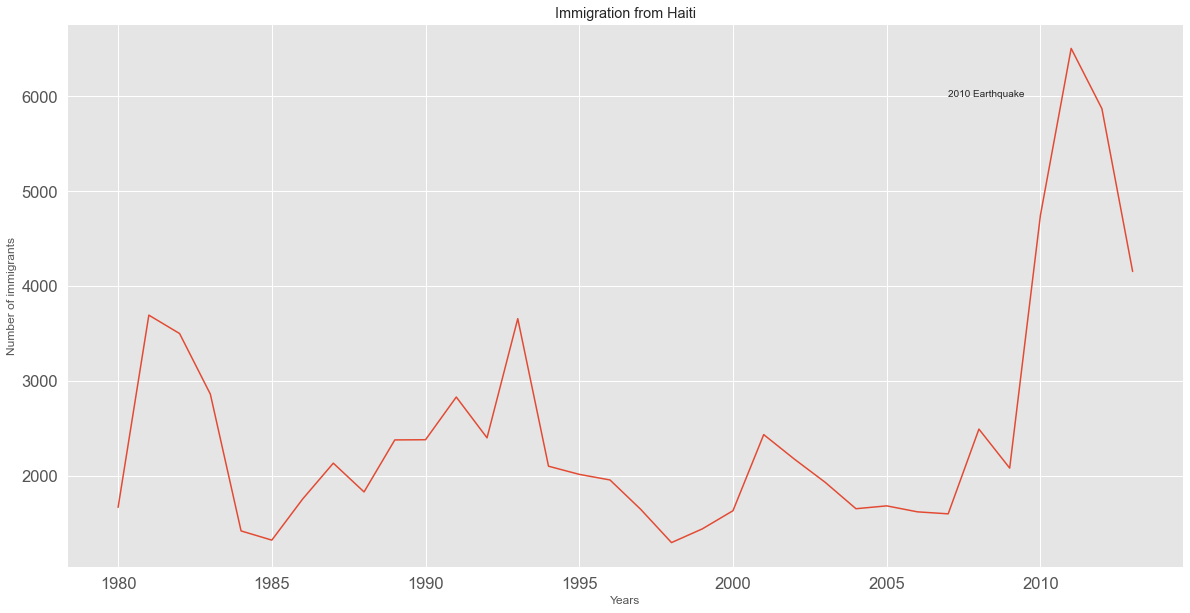

In [491]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=haiti)
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')

# Annotate plot with the 2010 Earthquake 
plt.text(2007, 6000, '2010 Earthquake');

As you can see, the steps and output are pretty much the same. There is the need to set the labels after calling the lineplot function because the haiti data is a [pandas series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). If it was a [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) you could just do as below.

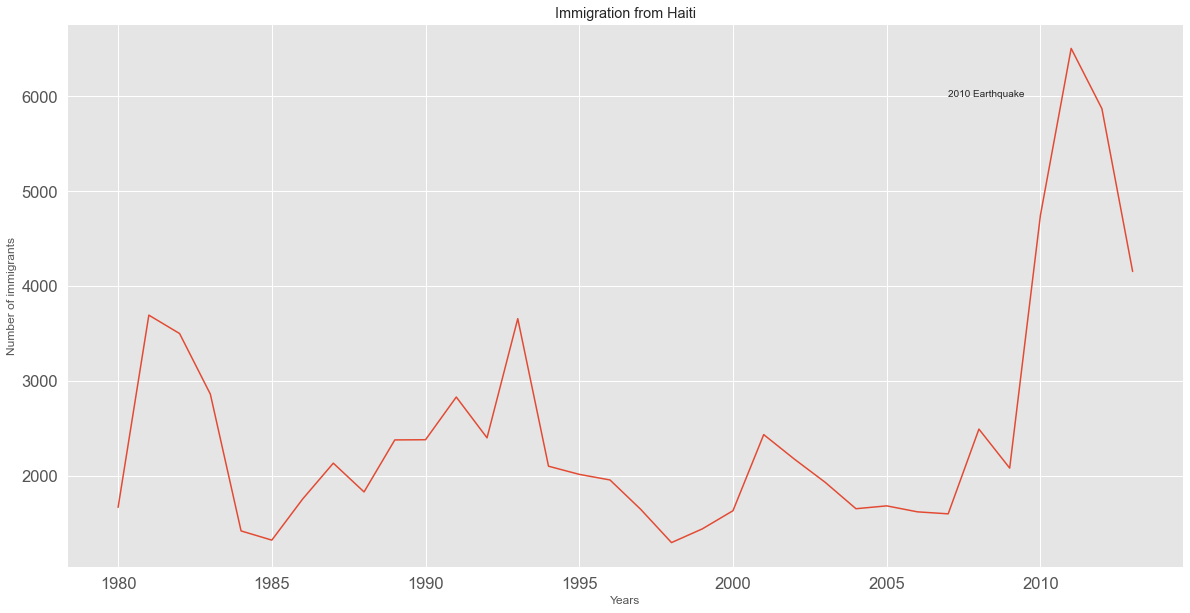

In [492]:
# Convert haiti data to a DataFrame
haiti_df = haiti.to_frame().reset_index().rename(columns = {'index':'Years', 'Haiti': 'Number of immigrants'})

plt.figure(figsize=(20,10))
sns.lineplot(data=haiti_df, x='Years', y='Number of immigrants').set_title('Immigration from Haiti')

# Annotate plot with the 2010 Earthquake 
plt.text(2007, 6000, '2010 Earthquake');

Plotly is the next contender!

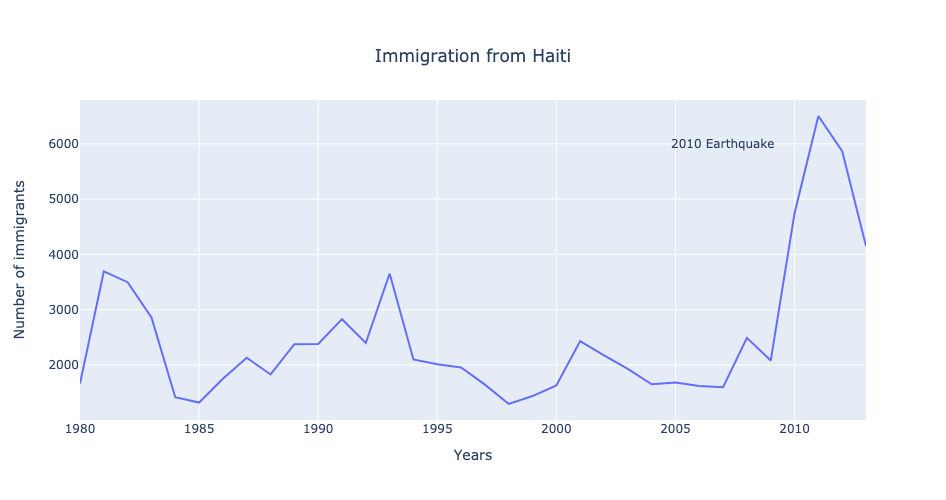

In [493]:
fig = px.line(haiti_df, x='Years', y='Number of immigrants', title='Immigration from Haiti', width=1000, height=500)

# Center Title
fig = fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Annotate plot with the 2010 Earthquake 
annotation = {
    'x': 2007,
    'y': 6000,
    'text': '2010 Earthquake',
    'showarrow': False,
}
fig.add_annotation(annotation)
fig.show()

Plotly works a bit differently. You can't perform text annotation and labelling using matplotlib functions, like it was done in the example above for seaborn. 

Before moving to another plot type, we are going to try a line plot with multiple lines. For this we are comparing the trends of the top 5 countries that contributed the most to immigration to Canada.

In [495]:
df_canada.sort_values(by='Total', ascending = False, axis = 0, inplace = True)
df_top5 = df_canada.head(5)
df_top5 = df_top5[years].transpose()
df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

df_top5.index = df_top5.index.map(int)

As before, we are trying matplotlib first, and then seaborn, plotly and bokeh, respectively.

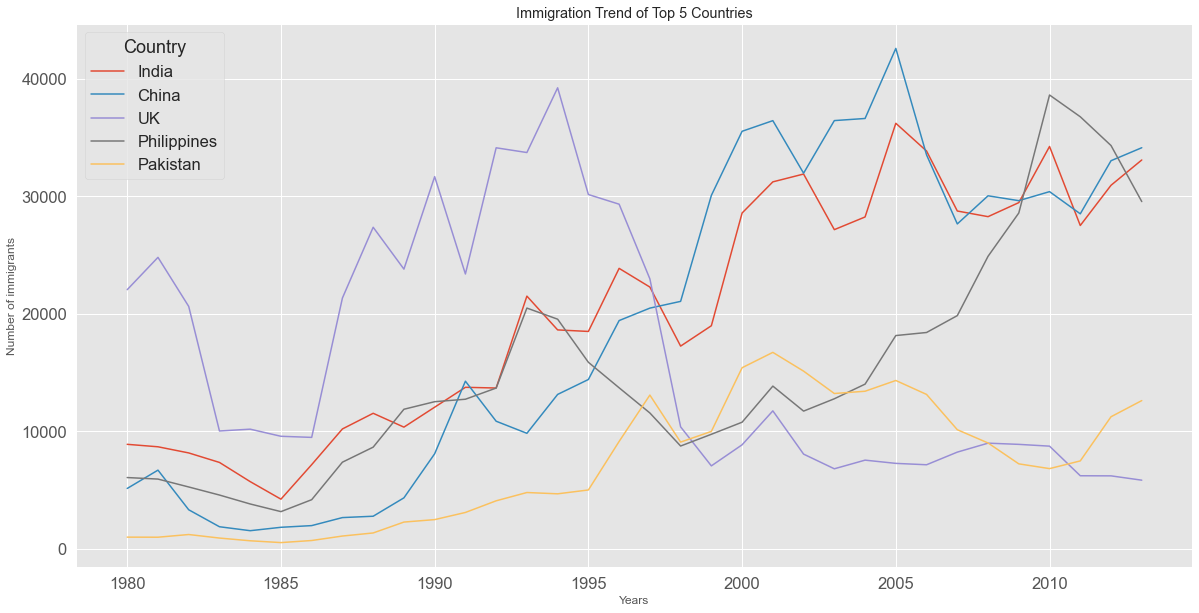

In [496]:
ax = df_top5.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

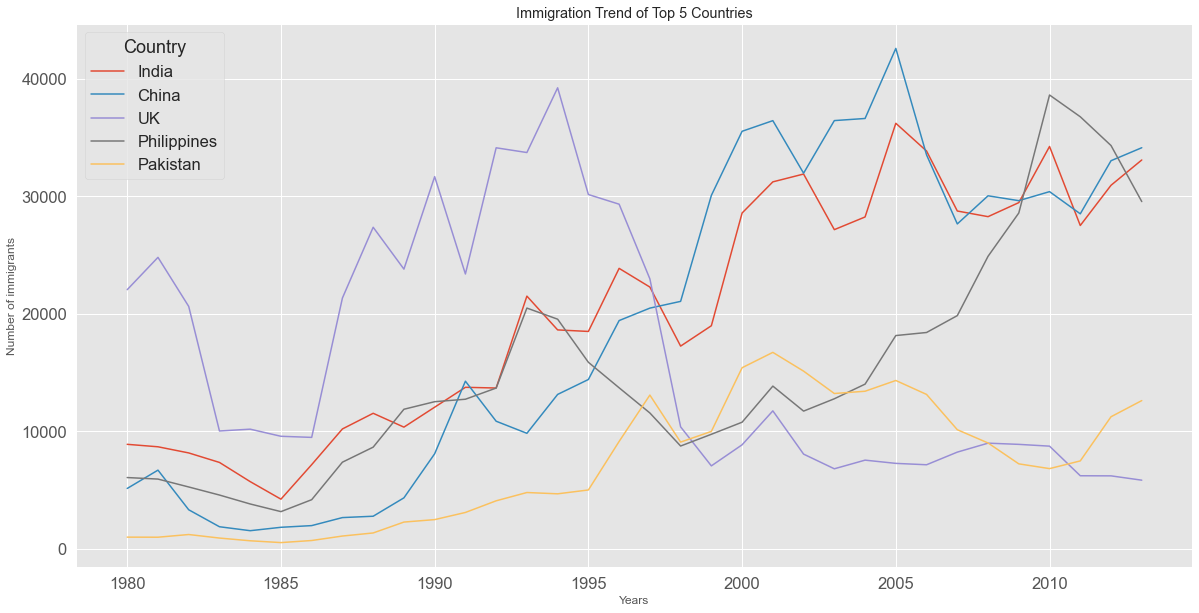

In [497]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_top5, dashes=False)
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

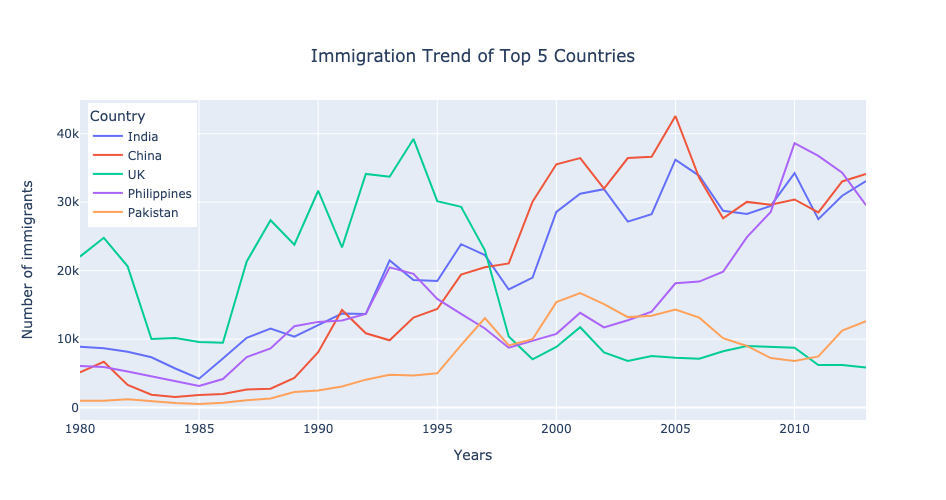

In [498]:
fig = px.line(df_top5, title='Immigration Trend of Top 5 Countries', width=1000, height=500,
             labels={
                     "index": "Years",
                     "value": 'Number of immigrants',
                 })

# Center Title and Move Legend to the left
fig = fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01)
)

fig.show()

And let's call it a day for line plots. Area plots are the next.

## Area Plots

We are going to visualize the same trend of the top 5 countries that contributed the most to immigration to Canada in a different way, using area plots. An area plot is a type of plot that illustrates accumulated totals over time. It is used to compare mulitple quantities.

In this section we are using matplotlib, plotly and bokeh in this respective order, since seaborn doesn't have a built-in function for area plots.

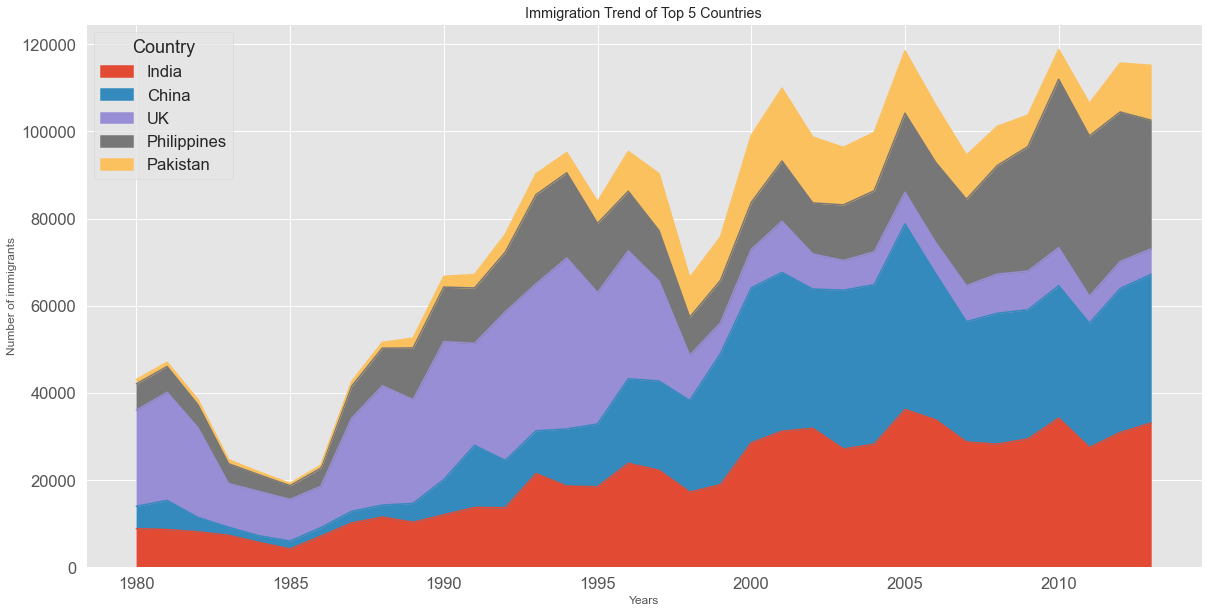

In [500]:
ax = df_top5.plot(kind = 'area', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

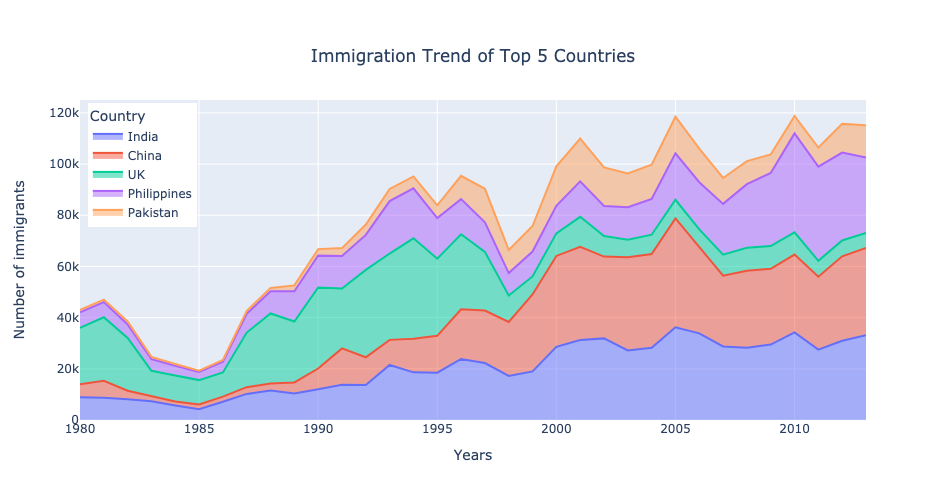

In [501]:
fig = px.area(df_top5, title='Immigration Trend of Top 5 Countries', width=1000, height=500,             
              labels={
                     "index": "Years",
                     "value": 'Number of immigrants',
                 }
             )

# Center Title and Move Legend to the left
fig = fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01)
)

fig.show()

More visually appealing than line plots, aren't they?

Moving to a completly different type of plot, histograms. 

## Histograms

A histogram shows the frequency distribution of a numeric dataset. It separates the data into bins and counts the number of datapoints that have been assigned to each bin. So the vertical axis is the number of datapoints in each bin.

For this section we are going to look at the frequency distribution of the number of new immigrants from the various countries to Canada in 2013.

Before plotting with matplotlib, we need to calculate the bin edges with [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html).

In [708]:
bin_counts, bin_edges = np.histogram(df_canada['2013'])
print(f"Bin counts: {bin_counts}")
print(f"Bin edges: {bin_edges}")

Bin counts: [178  11   1   2   0   0   0   0   1   2]
Bin edges: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Now we can plot the histogram, and pass a **`xticks`** argument that contains the list of the bin edges. If this argument is not passed, the x-axis labels will not match with the bin size. 

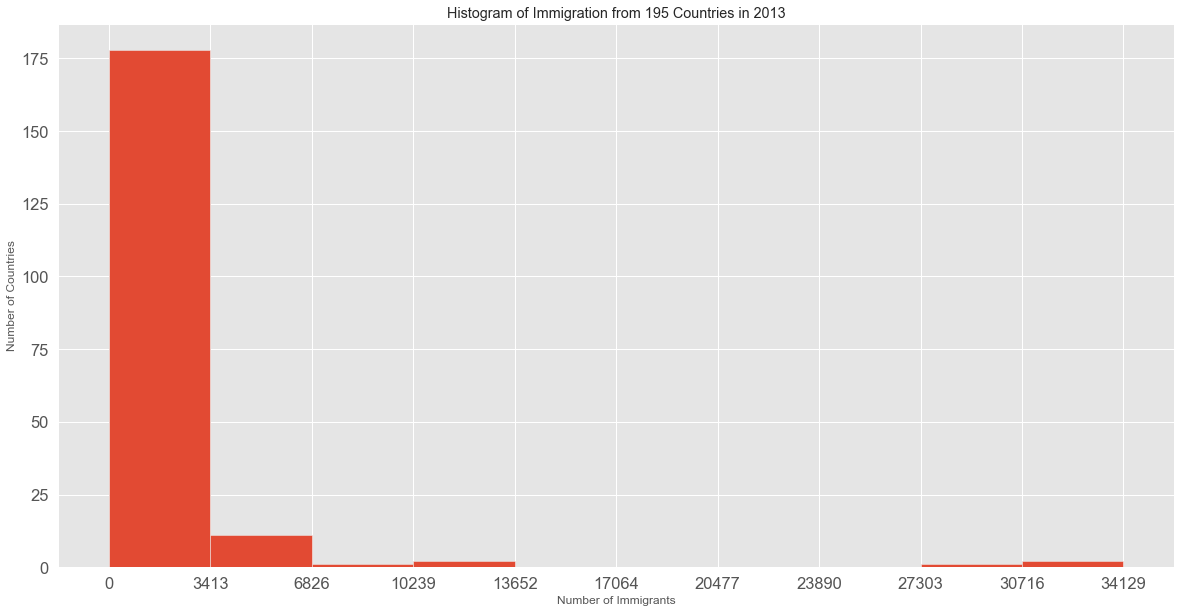

In [709]:
ax = df_canada['2013'].plot(kind='hist', figsize=(20,10), xticks=bin_edges)
ax.set(title='Histogram of Immigration from 195 Countries in 2013', ylabel='Number of Countries', xlabel='Number of Immigrants');

As before, seaborn comes second. 

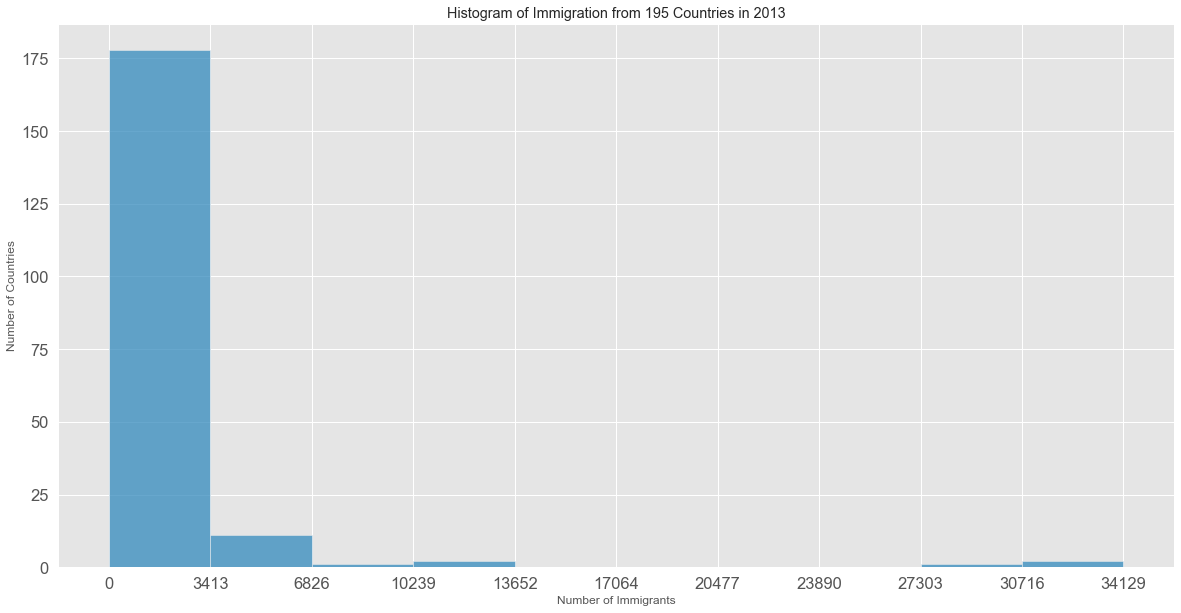

In [710]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_canada['2013'], bins=bin_edges)
plt.xticks(bin_edges)
ax.set(title='Histogram of Immigration from 195 Countries in 2013', ylabel='Number of Countries', xlabel='Number of Immigrants');

And plotly third. The [nbins parameter](https://plotly.com/python/histograms/) only allows to control the number o bins, you don't have control on the bin edges. The solution to solve this is bin the data yourself and plot a bar chart.

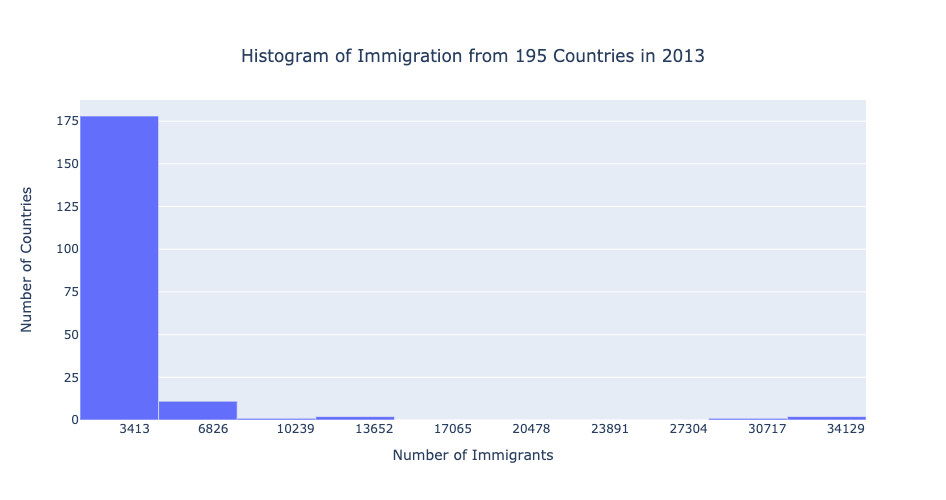

In [711]:
# TODO - Refactor to graph object

df = pd.DataFrame({'Number of Immigrants':bin_edges[1:], 'Number of Countries':bin_counts})
fig = px.bar(df, x='Number of Immigrants', y='Number of Countries', title='Histogram of Immigration from 195 Countries in 2013', width=1000, height=500)

# Center Title
fig = fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    bargap=0
)
fig.update_xaxes(tickangle=0,
                 tickmode = 'array',
                 tickvals = df['Number of Immigrants'].map(lambda x: math.ceil(x)),
                 ticktext= df['Number of Immigrants'].map(lambda x: math.ceil(x)),
                 ticklabelposition="outside right",
                 tickfont_size=12
                )
fig.update_yaxes(tickvals=[0,25,50,75,100,125,150,175])
fig.show()

What about bokeh? Bokeh used to provide a function for histograms with bokeh.charts, which was deprecated. However, it's possible to create histograms using the bokeh.plotting API, the [Quad class](https://docs.bokeh.org/en/latest/docs/reference/models/glyphs/quad.html) to be more specific.

What if we want to plot multiple histograms on the same plot? Easy-peasy!

To show how to do this, we are going to look at the immigration distribution for Denmark, Norway, and Sweden between 1980 and 2013.

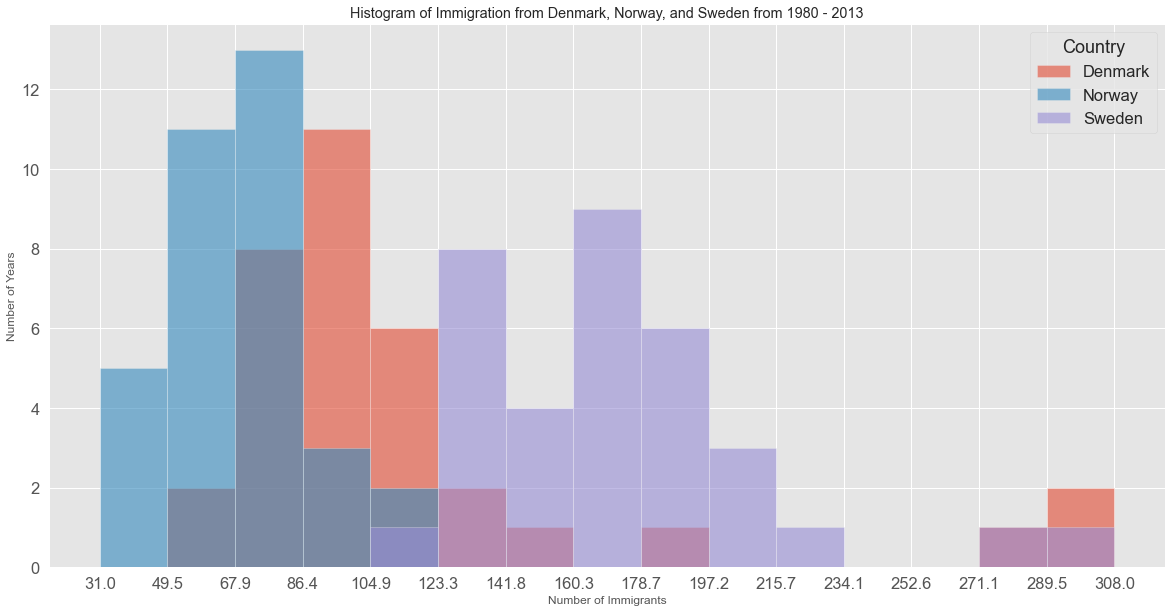

In [717]:
df_t = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes
ax = df_t.plot(kind='hist', figsize=(20,10),bins=15, xticks=bin_edges, alpha=0.6)
ax.set(title='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', ylabel='Number of Years', xlabel='Number of Immigrants');

Seaborn doesn't need great changes.

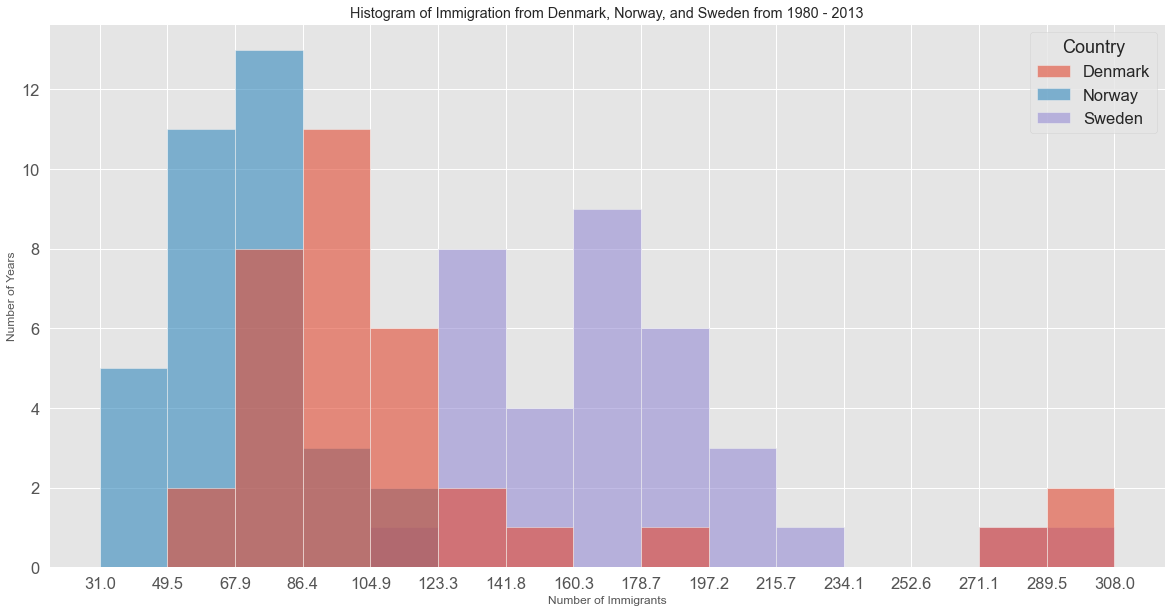

In [718]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_t, bins=bin_edges, alpha=0.6)
plt.xticks(bin_edges)
ax.set(title='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', ylabel='Number of Years', xlabel='Number of Immigrants');

Let's have another look at plotly.

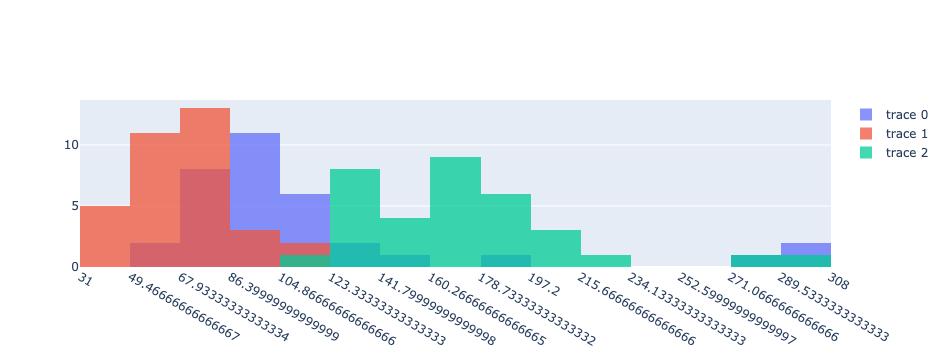

In [769]:
"""import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_t['Denmark']))
fig.add_trace(go.Histogram(x=df_t['Norway']))
fig.add_trace(go.Histogram(x=df_t['Sweden']))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()"""

import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Histogram(
    x=df_t['Denmark'],
    xbins=dict( # bins used for histogram
        start=31,
        end=330,
        size=18.5
    ),
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=df_t['Norway'],
        xbins=dict( # bins used for histogram
        start=31,
        end=330,
        size=18.5
    ),opacity=0.75))

fig.add_trace(go.Histogram(
    x=df_t['Sweden'],
        xbins=dict( # bins used for histogram
        start=31,
        end=330,
        size=18.5
    ), opacity=0.75),
)


fig.update_layout(
    barmode="overlay",
    bargap=0,
)

fig.update_xaxes(
                 tickmode = 'array',
                 tickvals =bin_edges ,
                 ticktext= bin_edges,
                 ticklabelposition="outside right",
                 tickfont_size=12
                )


fig.show()

## Bar Charts

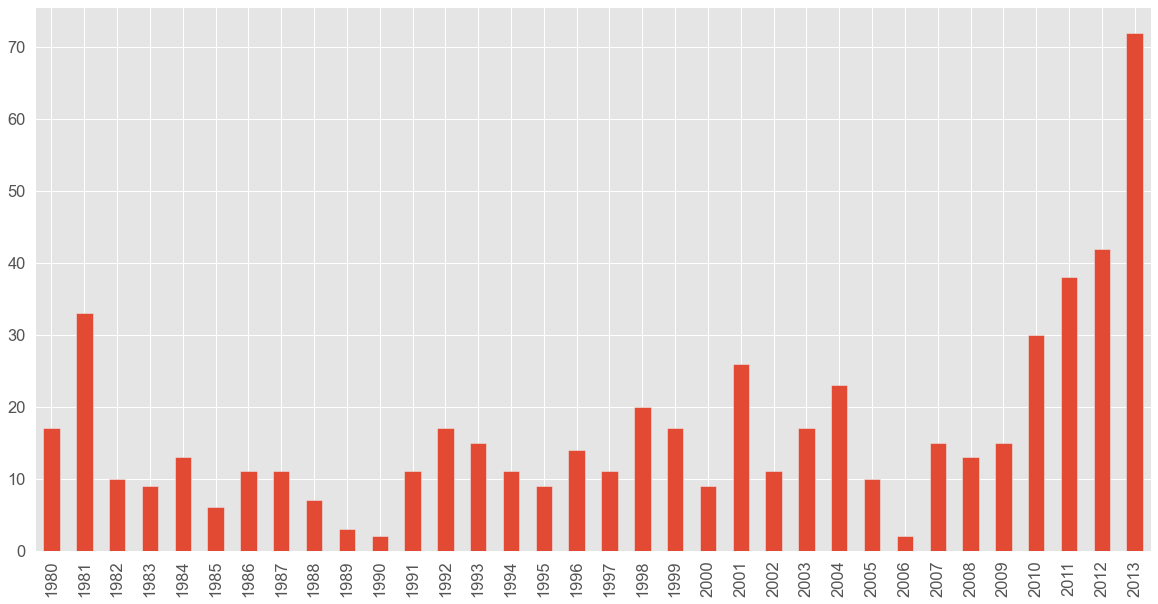

In [796]:
df_iceland = df_canada.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(20, 10))
ax.set(title='Icelandic immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year');

/Users/joaogoncalves/Documents/code/notebooks/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



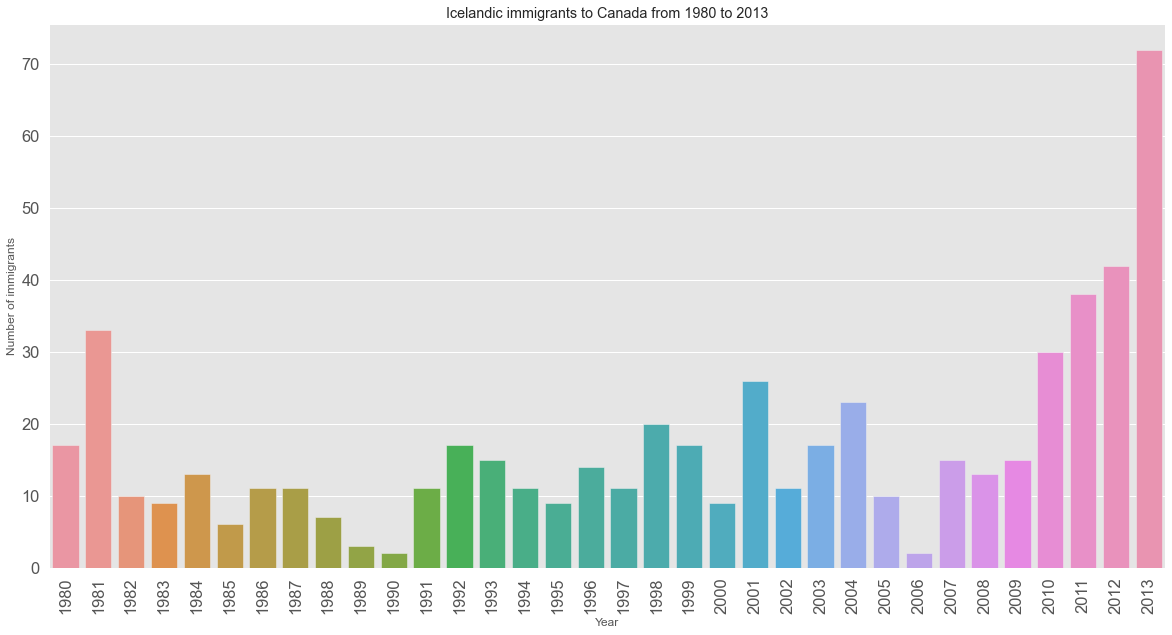

In [799]:
plt.figure(figsize=(20,10))

ax = sns.barplot(df_iceland.index, df_iceland.values);
ax.set(title='Icelandic immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year');
plt.xticks(rotation=90);

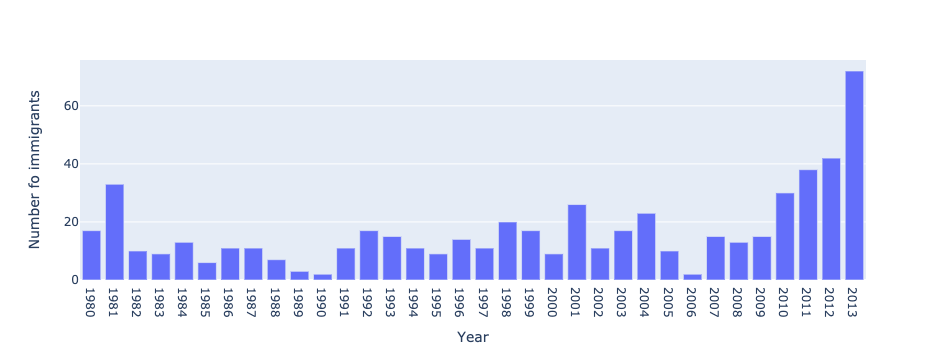

In [802]:
iceland = pd.DataFrame({'Year': df_iceland.index, 'Number fo immigrants': df_iceland.values})
fig = px.bar(iceland, x='Year', y='Number fo immigrants')
fig.show()

What about horizontal bar plots?

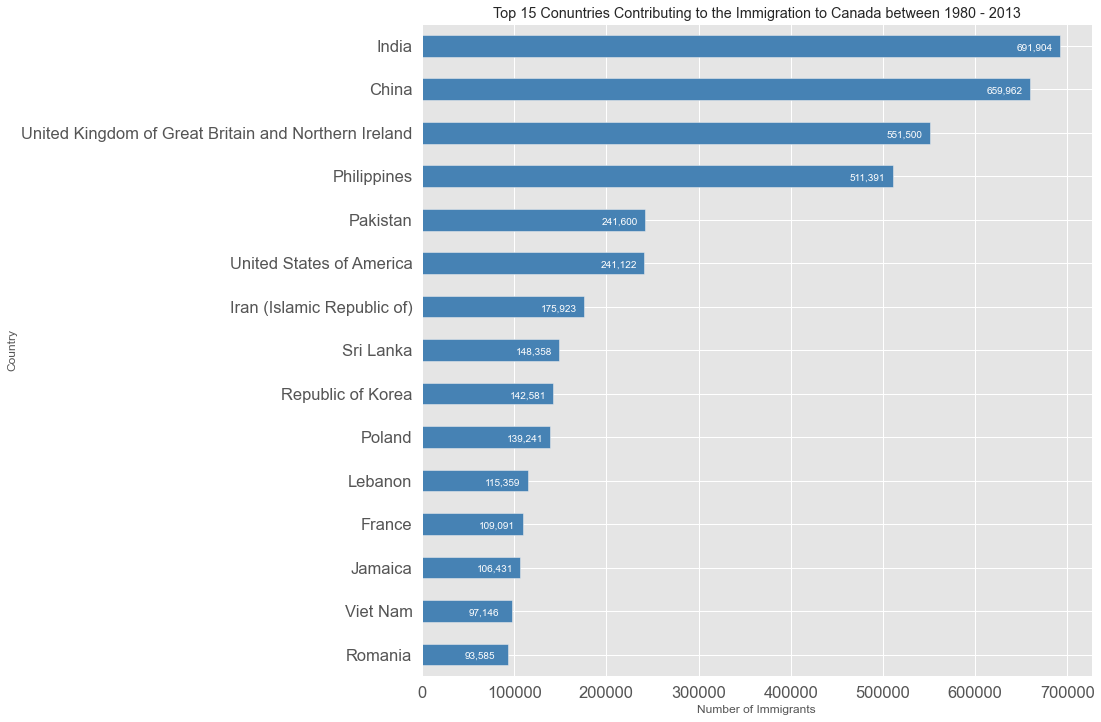

In [851]:
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)

 # generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()    

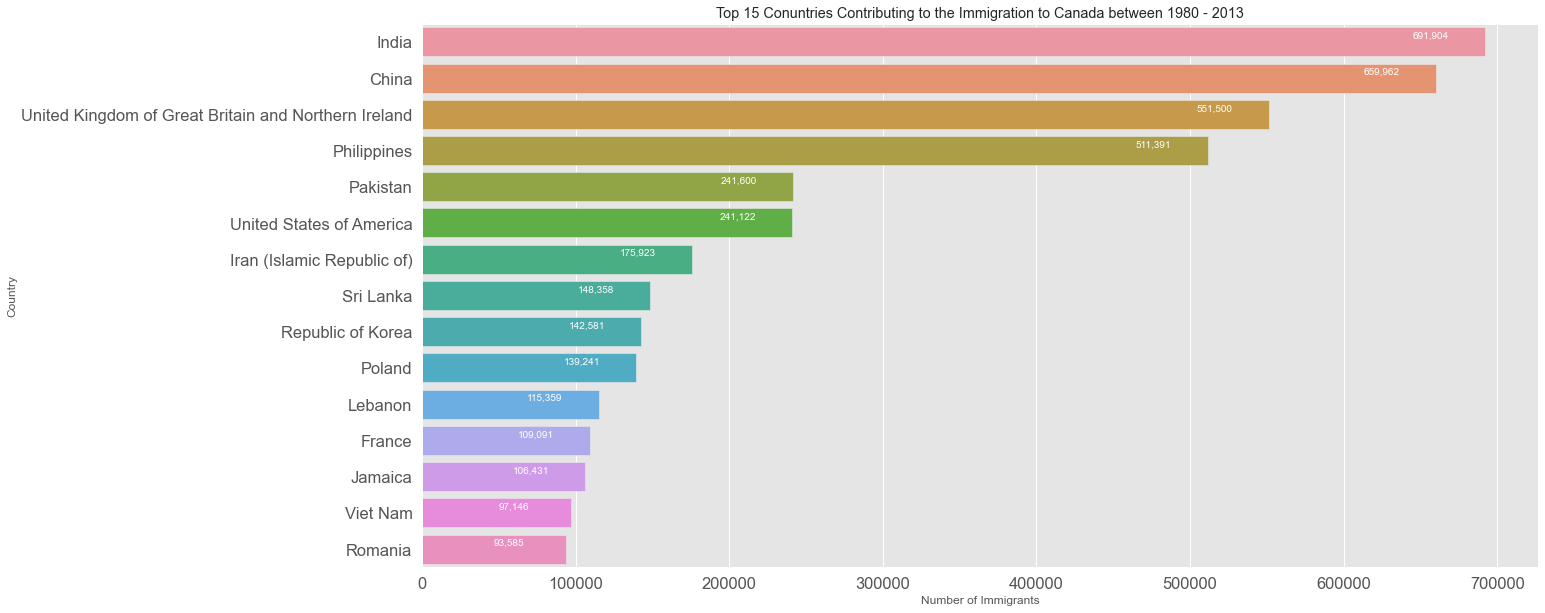

In [853]:
plt.figure(figsize=(20,10))
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)
df_top15.sort_values(ascending=False, inplace=True)

 # generate plot
sns.barplot(y=df_top15.index, x=df_top15.values, orient='h')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()    

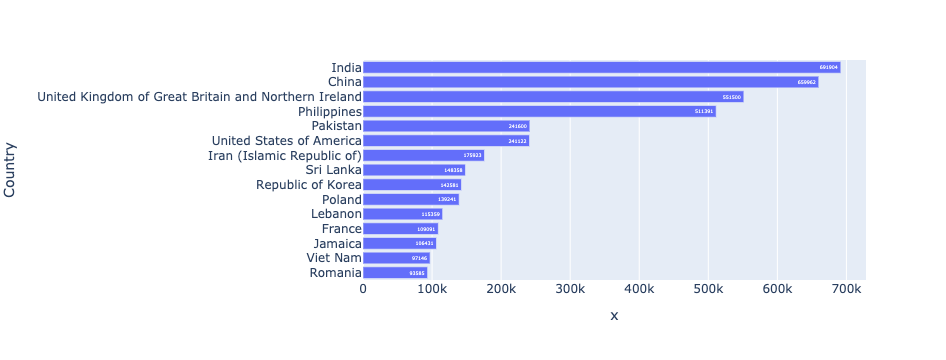

In [861]:
df_top15.sort_values(ascending=False, inplace=True)
fig = px.bar(df_top15, y=df_top15.index, x=df_top15.values, text = df_top15.values, orientation='h', category_orders={'Country': df_top15.index})
fig.show()

## Pie Charts

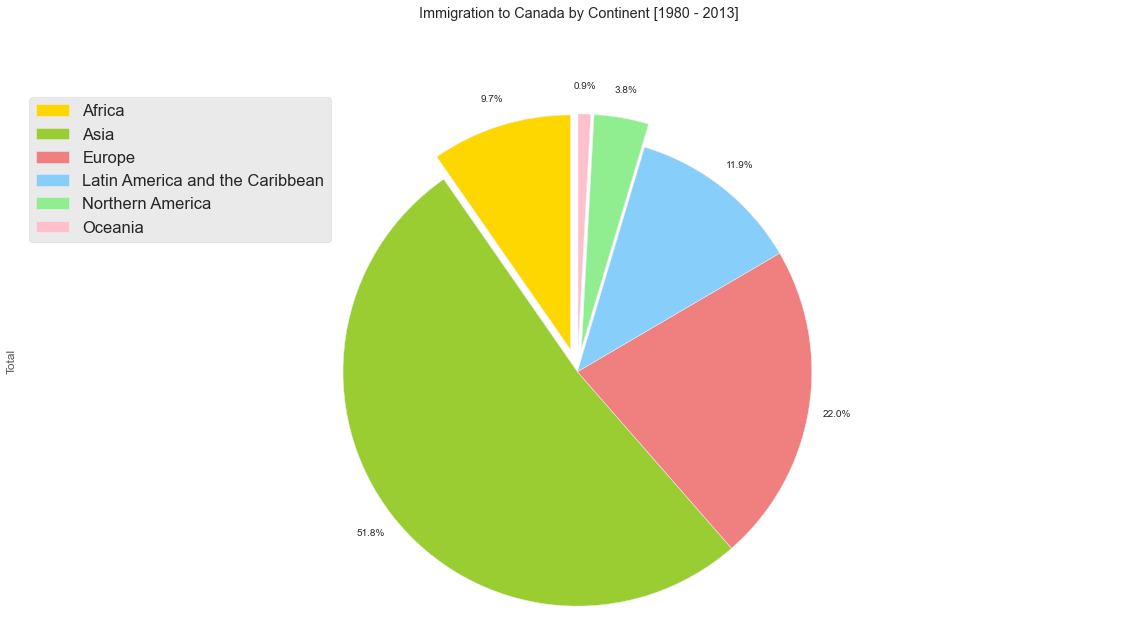

In [928]:
df_continents = df_canada.groupby('Continent', axis=0).sum()

# Change background color
fig = plt.figure()
fig.patch.set_facecolor('white')

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents['Total'].plot(kind='pie', 
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

Pie charts are not directly available in Seaborn

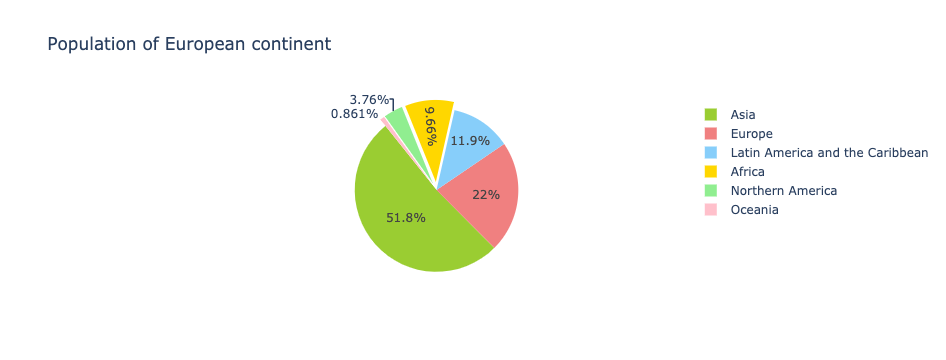

In [927]:
fig = px.pie(df_continents['Total'], values=df_continents['Total'].values, names=df_continents['Total'].index, title='Population of European continent')
fig.update_traces(marker=dict(colors=colors_list), rotation=135, pull=[0.1, 0, 0, 0, 0.1, 0.1])
fig.show()

## Box Plots

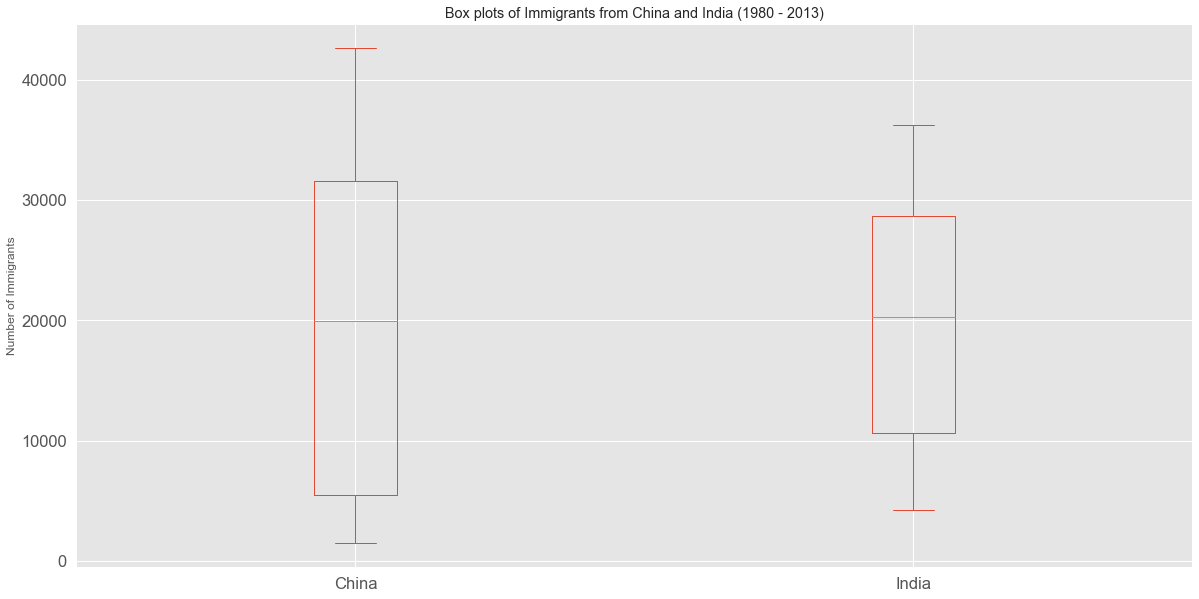

In [1021]:
df_CI = df_canada.loc[['China','India'], years].transpose()
df_CI.plot(kind='box', figsize=(20, 10))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants');

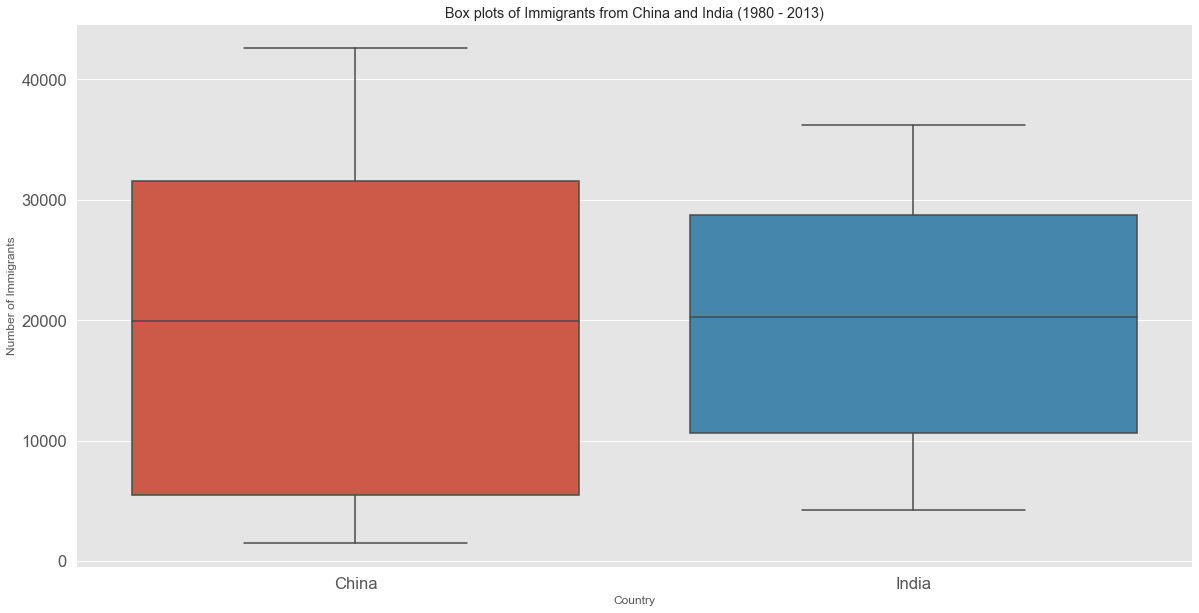

In [1046]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_CI)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants');

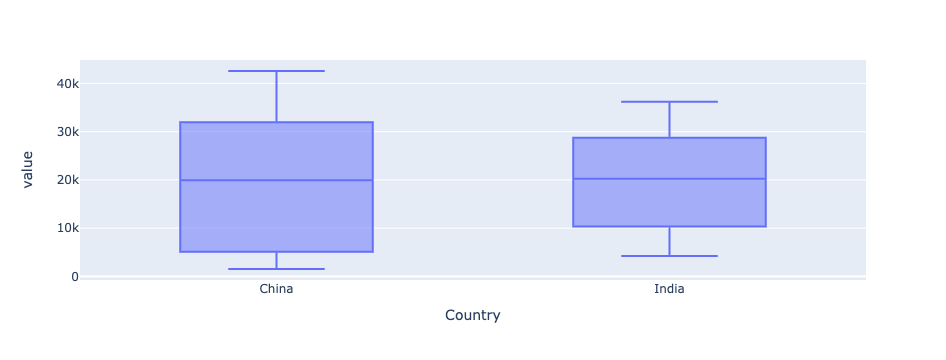

In [1047]:
fig = px.box(df_CI)
fig.show()

## Scatter Plots

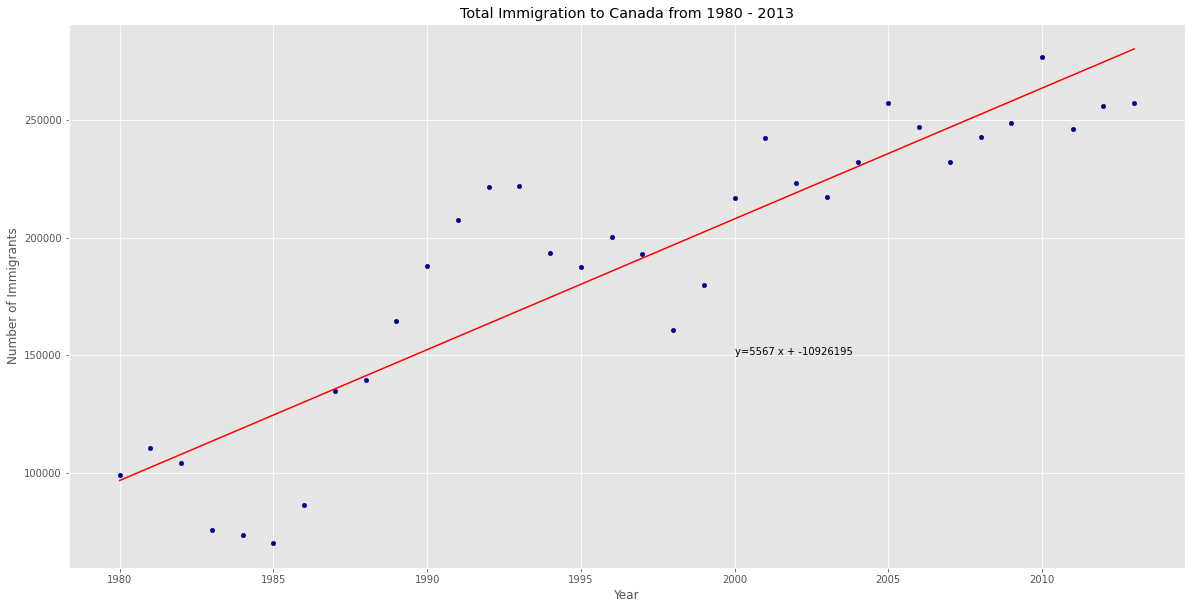

In [18]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']
fit = np.polyfit(df_total['year'], df_total['total'], deg=1)

df_total.plot(kind='scatter', x='year', y='total', figsize=(20, 10), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# Plot line of best fit
plt.plot(df_total['year'], fit[0] * df_total['year'] + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()